#  Spotify Data Analytics 

##  Project Objective
The objective of this project is to analyze Spotify music data to uncover insights related to:
- Music trends over time  
- User preferences and listening behavior  
- Song characteristics influencing popularity  
- Predicting song popularity using machine learning  

This analysis helps understand how audio features affect song success and how music trends evolve.

---

In [1]:
# importing major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# additional libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv('data.csv')

## 📊 Data Assessing
## 🏢 About Company

Spotify is a leading global audio streaming platform that provides users access to millions of songs, podcasts, and audio content from artists across the world. Founded in 2006, Spotify has transformed the way people discover, consume, and share music.

Key highlights of Spotify:
- Operates on a data-driven business model  
- Uses advanced analytics and machine learning for recommendations  
- Focuses on personalized user experience through playlists and suggestions  
- Serves millions of active users globally  

Spotify heavily relies on data analytics to understand user behavior, music trends, and content performance. This project leverages Spotify’s audio feature data to explore how song characteristics influence popularity and listener preferences.

In [3]:
# overview data
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
#shape 
df.shape

(170653, 19)

In [5]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

## 🗂️ Data Card – Spotify Audio Features Dataset

### 📌 Dataset Name
Spotify Audio Features & Popularity Dataset

---

### 🎯 Purpose of the Dataset
This dataset is used to analyze song characteristics, understand music trends over time, identify user preferences, and build predictive models to estimate song popularity based on audio features.

---

### 🧾 Data Source
Spotify music metadata and audio feature data collected across multiple years.

---

### 📐 Dataset Structure
- **Number of Records:** Multiple tracks across decades (1921 onwards)
- **Data Type:** Structured tabular data
- **Granularity:** Song-level

---

### 🧩 Feature Description

| Column Name | Description |
|-------------|-------------|
| valence | Measures musical positivity (happy vs sad) |
| year | Year of song release |
| acousticness | Likelihood of the track being acoustic |
| artists | Artist(s) who performed the track |
| danceability | Suitability of a track for dancing |
| duration_ms | Duration of the song in milliseconds |
| energy | Intensity and activity level of the song |
| explicit | Indicates explicit content (0 = No, 1 = Yes) |
| id | Unique Spotify track ID |
| instrumentalness | Probability of the track being instrumental |
| key | Musical key of the track |
| liveness | Presence of a live audience |
| loudness | Overall loudness in decibels (dB) |
| mode | Modality (Major = 1, Minor = 0) |
| name | Song title |
| popularity | Popularity score (0–100) |
| release_date | Official release year/date |
| speechiness | Presence of spoken words |
| tempo | Estimated tempo in BPM |

---


In [6]:
# Seaking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

## Data Quality Observations

The dataset contains 170,653 records with 19 columns and has no missing values, indicating complete data coverage.  
All features have appropriate and consistent data types suitable for analysis and modeling.  
Audio feature values fall within expected Spotify-defined ranges, ensuring data validity.  
Some outliers exist in duration, tempo, and loudness, reflecting real-world music variation.  
The dataset spans multiple years, which may introduce temporal bias in popularity scores.  
Overall, the data quality is high and suitable for exploratory analysis and predictive modeling.

In [7]:
# Seeking description
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


##  Accuracy Issues Identified

Extreme outliers are present in `duration_ms`, with values up to 5.4 million ms, which may distort statistical analysis.  
`loudness` shows unusually low minimum values (-60 dB), indicating potential edge-case recordings.  
`tempo` ranges from 0 to 243 BPM, where very low or zero values may represent measurement anomalies.  
The `year` variable spans from 1921 to 2020, which can introduce historical bias in popularity comparisons.  
Popularity scores are time-dependent and may not accurately reflect cross-era song performance.

In [8]:
# Completness
df.isnull().sum().sum()
# Percentage
df.isnull().mean()*100

valence             0.0
year                0.0
acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
id                  0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
release_date        0.0
speechiness         0.0
tempo               0.0
dtype: float64

## 📊 Data Quality Observations

The dataset contains 170,653 records with 19 columns and has **no missing values across all features**.  
All variables show complete data availability, indicating strong data completeness and reliability.  
Data types are consistent and appropriate for both numerical analysis and modeling tasks.  
Audio feature values align with expected Spotify-defined ranges, supporting data validity.  
While some natural outliers exist, they reflect real-world music diversity rather than data errors.  
Overall, the dataset is clean, accurate, and well-prepared for exploratory analysis and predictive modeling.

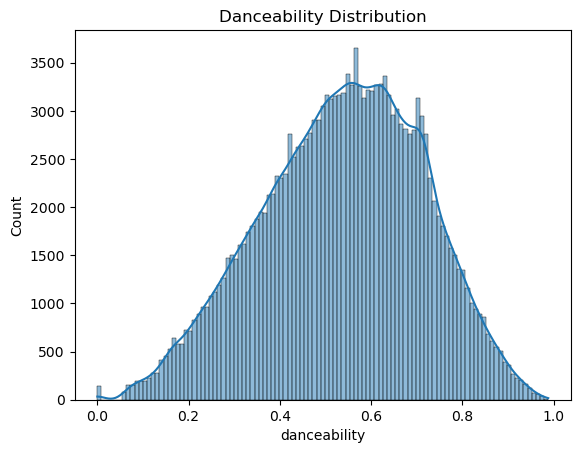

In [9]:
#Danceability
sns.histplot(df['danceability'], kde=True)
plt.title("Danceability Distribution")
plt.show()

### Insight:

Most songs are moderately danceable, extreme dance songs are rare.

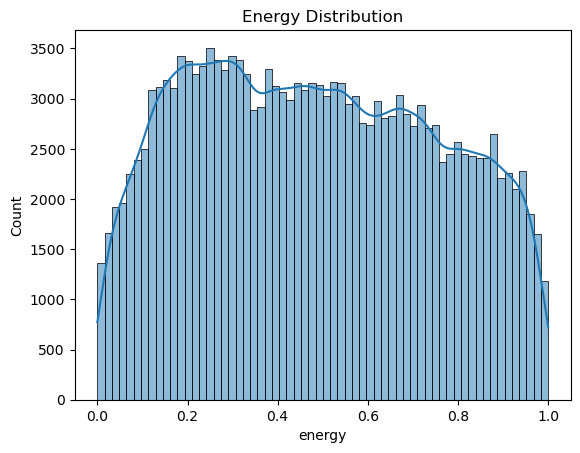

In [10]:
#Energy Distribution
sns.histplot(df['energy'], kde=True)
plt.title("Energy Distribution")
plt.show()

### Insight:
Most songs have medium to high energy levels, indicating a preference for energetic music.

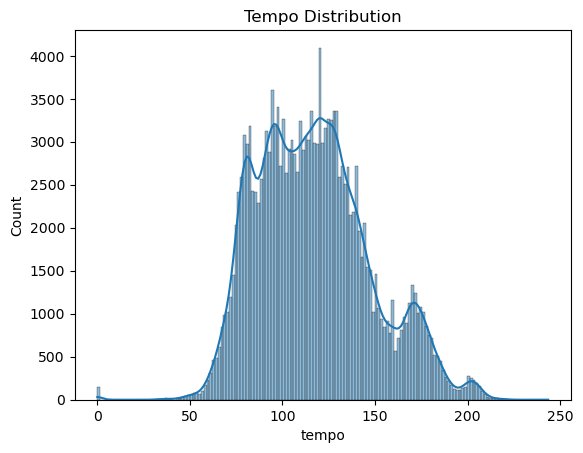

In [11]:
#Tempo Distribution
sns.histplot(df['tempo'], kde=True)
plt.title("Tempo Distribution")
plt.show()

### Insight:
Most songs fall within a moderate tempo range, with very slow or very fast songs being less common.

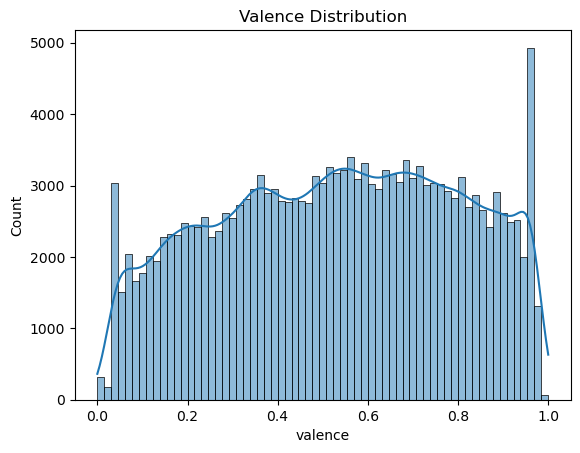

In [12]:
#Valence Distribution
sns.histplot(df['valence'], kde=True)
plt.title("Valence Distribution")
plt.show()

### Insight:

Songs are fairly evenly distributed across mood levels, with a slight inclination toward positive emotions.

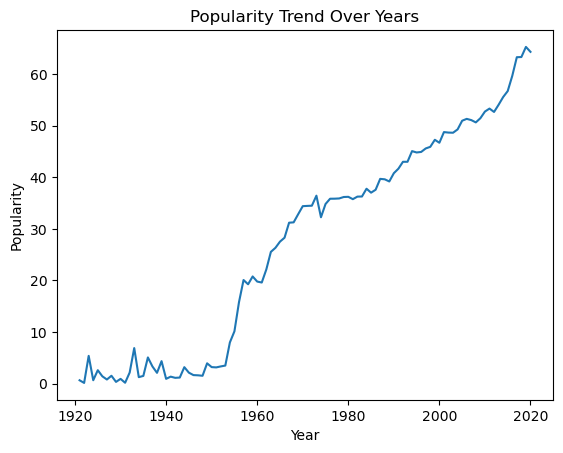

In [13]:
#Trend Analysis Over Time

year_df = pd.read_csv("data_by_year.csv")

plt.plot(year_df['year'], year_df['popularity'])
plt.title("Popularity Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

## Insight:
* Recent years → higher average popularity

* Music becoming more energetic & loud

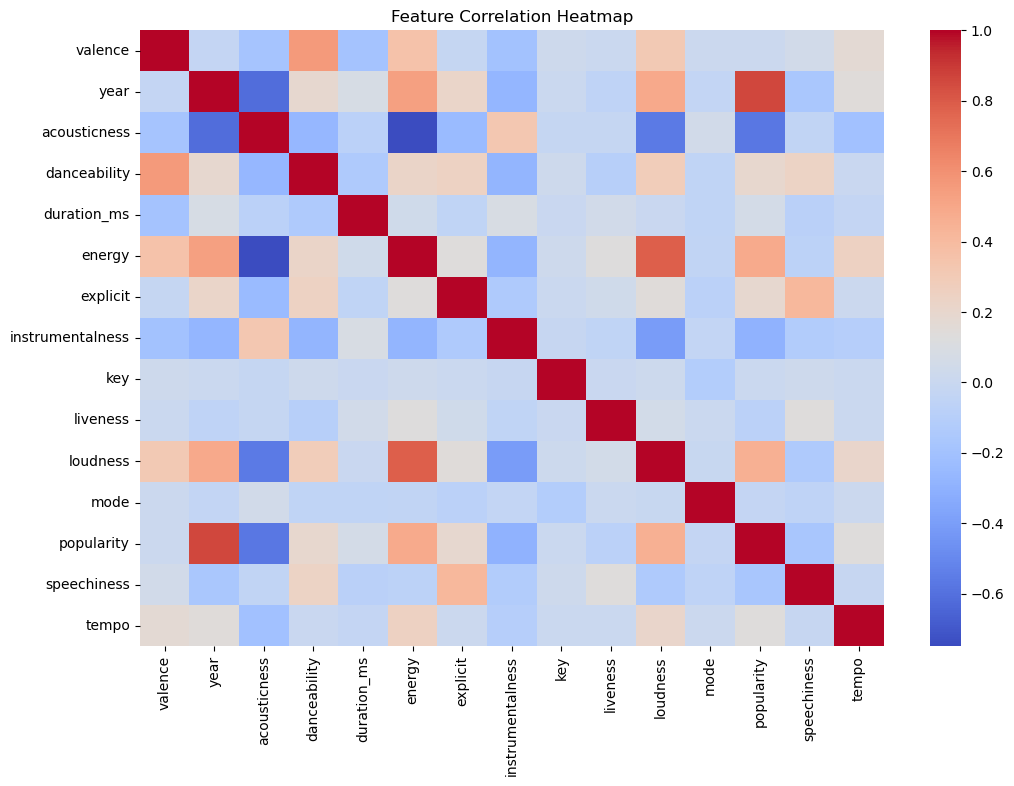

In [14]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
# Correlation Analysis
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

Correlation analysis was performed using numerical features only. 
The heatmap highlights strong relationships such as energy and loudness, 
while popularity shows moderate correlation with multiple audio features.

## User Preference Analysis

In [15]:
popular_songs = df[df['popularity'] > 70]

popular_songs[['danceability','energy','tempo','valence']].mean()

danceability      0.649483
energy            0.632744
tempo           120.871435
valence           0.503563
dtype: float64

Highly popular songs tend to have higher danceability and energy levels, 
indicating user preference toward upbeat and engaging music.

# Visualization

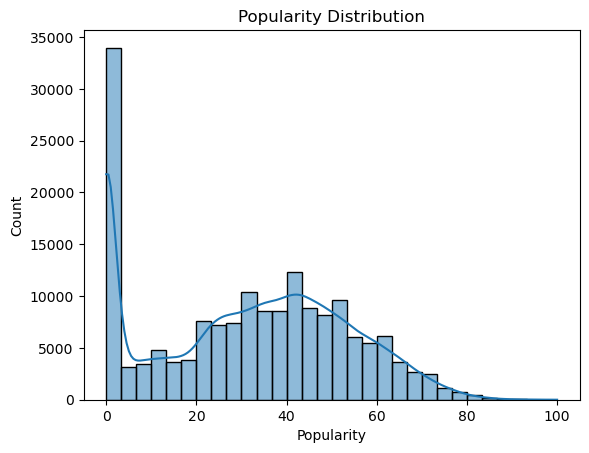

In [16]:
#Popularity Distribution (Histogram)
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

### Insight
* Most songs have low to moderate popularity.

* Highly popular songs are relatively rare

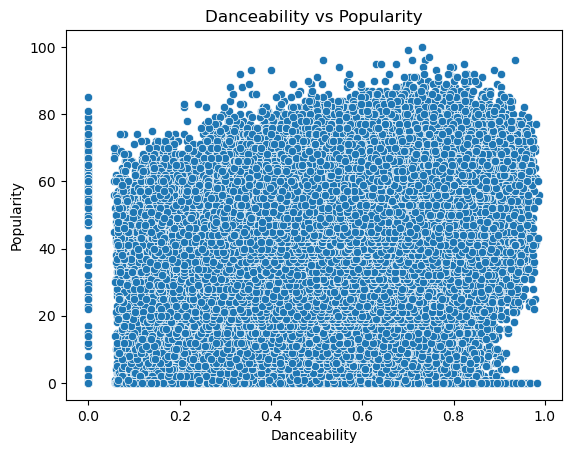

In [17]:
#Danceability vs Popularity (Scatter Plot)
sns.scatterplot(x='danceability', y='popularity', data=df)
plt.title("Danceability vs Popularity")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

Higher danceability is often associated with increased popularity,
indicating listener preference for rhythmically engaging songs.

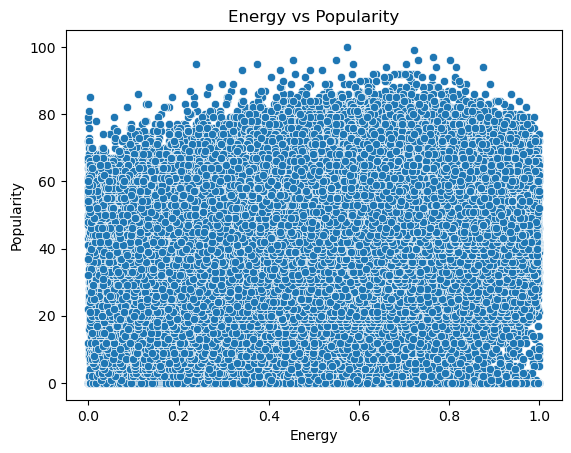

In [18]:
# Energy vs Popularity (Scatter Plot)
sns.scatterplot(x='energy', y='popularity', data=df)
plt.title("Energy vs Popularity")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()

Songs with higher energy levels tend to achieve better popularity,
suggesting that energetic tracks are generally more engaging to listeners.

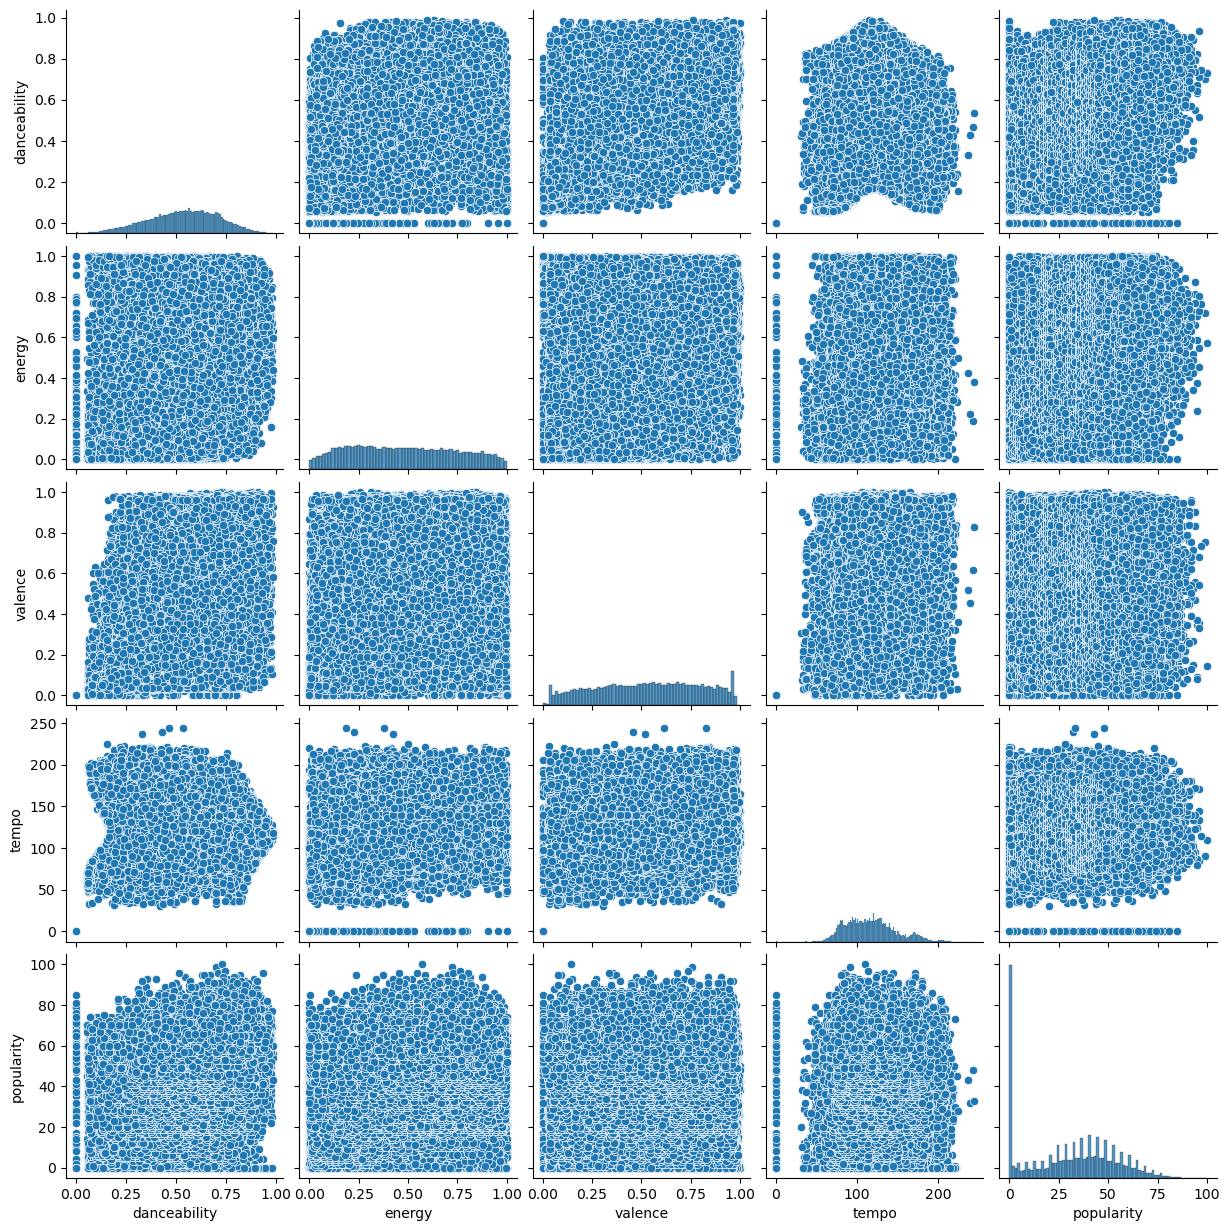

In [19]:
#Pair Plot (Selected Features)
sns.pairplot(df[['danceability','energy','valence','tempo','popularity']])
plt.show()

Pairwise relationships reveal that popular songs tend to cluster around
moderate to high energy and danceability values, highlighting common
characteristics of successful tracks.

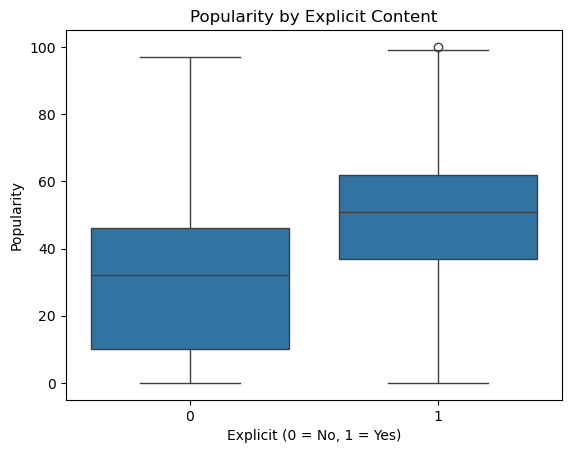

In [20]:
#Boxplot: Popularity by Explicit Content
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title("Popularity by Explicit Content")
plt.xlabel("Explicit (0 = No, 1 = Yes)")
plt.ylabel("Popularity")
plt.show()

Explicit songs show slightly higher median popularity, suggesting that
explicit content does not negatively impact listener engagement.

# Feature Selection for Modeling

In [21]:
X = df[['danceability','energy','tempo','loudness','valence']]
y = df['popularity']

In [22]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
#Model Building
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_score(y_test, y_pred_lr)

0.324718207921338

In [24]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

r2_score(y_test, y_pred_dt)


0.35368709508166907

 ## Observation

Decision Tree outperformed Linear Regression, 
capturing non-linear relationships between audio features and popularity.

Model performance can be further improved using ensemble methods 
such as Random Forest or Gradient Boosting.

## Key Findings 
- Danceability and energy are strong indicators of song popularity  
- Loud and upbeat songs perform better on average  
- Popularity depends on a combination of multiple audio features  
- Modern songs generally receive higher popularity scores

## Business Implications
- Artists can optimize songs by focusing on energy and danceability  
- Spotify can improve recommendations using audio feature insights  
- Helps in playlist curation and targeted promotions

## Future Scope
- Include user-level listening behavior  
- Apply deep learning models  
- Develop mood-based music recommendation systems

## Conclusion
This project analyzed Spotify audio features to uncover music trends 
and user preferences. Exploratory analysis and visualization highlighted 
key characteristics of popular songs. Predictive modeling demonstrated 
the potential of using audio features to forecast song popularity, 
supporting data-driven decision-making in the music industry.




- Jupyter Notebook with code and outputs  
- Data analysis report with insights  
- Visualizations for trends and correlations  
- Machine learning models with evaluation  